# Marcenko pasture pdf and Random matrixes

Let X be i.i.d random observations of size TxN with mean 0, and variance \sigma^2 then the correlation matrix has eigenvalues \lambda distributed according to the Marcenko-Pastur distribution

\begin{equation*}
f(\lambda) = \frac{T}{N}\frac{\sqrt{( \lambda_+-\lambda )( \lambda_--\lambda )}}{2\pi\lambda\sigma^2}\unicode{x1D7D9}_{(\lambda_-,\lambda_+)}
\end{equation*}

where 
\begin{equation*}
\lambda_+ = \sigma^2(1+\sqrt{\frac{N}{T}})^2 \\
\lambda_- = \sigma^2(1-\sqrt{\frac{N}{T}})^2
\end{equation*}

When C is a correlation matrix, \sigma^2=1


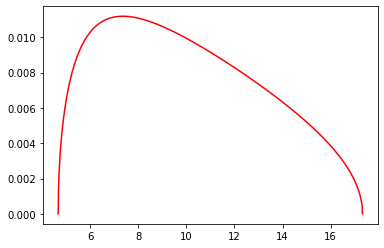

In [13]:

import pandas as pd
from sklearn.neighbors import KernelDensity
import matplotlib.pylab as plt
from scipy.optimize import minimize

#Marcenko-Pastur pdf
#q=T/N 
def mpPDF(var, q, pts):
    eMin, eMax = var*(1-(1./q)**.5)**2, var*(1+(1./q)**.5)**2 # calc lambda_minus, lambda_plus
    eVal = np.linspace(eMin, eMax, pts) #Return evenly spaced numbers over a specified interval. eVal='lambda'
    pdf = q/(2*np.pi*var*eVal)*((eMax-eVal)*(eVal-eMin))**.5 #np.allclose(np.flip((eMax-eVal)), (eVal-eMin))==True
    pdf = pd.Series(pdf, index=eVal)
    return pdf

N = 1000
T = 10000
pdf0 = mpPDF(1., q=N/T, pts=N)
plt.plot(pdf0.keys(), pdf0, color='r', label="Marcenko-Pastur pdf")

The Weigner eigenvalues displays universality.

1. Macroscopic scale: MP obeys the Weigner semicircle law
2. Mecoscopi scale:
3. Microscopic scale: distribtion of eigenvalues is an open problem in analysis
Terence Tao:(https://www.youtube.com/watch?v=tihxQGGrMcc)

## Correlation matrixes
\begin{equation*}
corr(X,Y) = \frac{cov(X,Y)}{\sigma_x \sigma_y}
\end{equation*}

\begin{equation*}
cov(X,Y) = E[(X-E[X])(Y-E[Y])]
\end{equation*}
Correlation is just covariance scaled to [-1,1]

In [16]:
    N = 1000
    T = 10000
    x = np.random.normal(0, 1, size = (T, N))
    # x has 1000 indicators - one pr column - with rows=10.000 time-steps
    cor = np.corrcoef(x, rowvar=0) 

\begin{equation*}
corr(X,Y) = \frac{cov(X,Y)}{\sigma_x \sigma_y}
\end{equation*}

\begin{equation*}
cov(X,Y) = E[(X-E[X])(Y-E[Y])]
\end{equation*}
Correlation is just covariance normalized to [-1,1]

Lets define a function to get the eigenvalues, and eigenvectors - sorted

In [17]:
def getPCA(matrix):
    # Get eVal, eVec from a Hermitian matrix
    eVal, eVec = np.linalg.eig(matrix) #complex Hermitian (conjugate symmetric) or a real symmetric matrix.
    indices = eVal.argsort()[::-1] #arguments for sorting eval desc
    eVal,eVec = eVal[indices],eVec[:,indices]
    eVal = np.diagflat(eVal) # identity matrix with eigenvalues as diagonal
    return eVal,eVec

We have the correlation matrix distributed as N(0,1). Lets find the eigenvalues and plot the histogram with MP pdf.

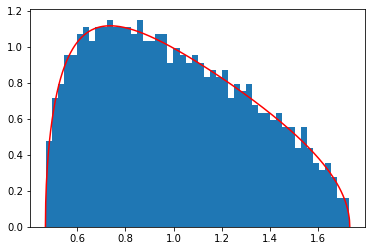

In [29]:
eVal0 , eVec0 = getPCA( cor ) 
pdf0 = mpPDF(1., q=x.shape[0]/float(x.shape[1]), pts=N)
fig = plt.figure()
ax  = fig.add_subplot(111)
ax.hist(np.diag(eVal0), density = True,bins=50) # Histogram the eigenvalues
plt.plot(pdf0.keys(), pdf0, color='r', label="Marcenko-Pastur pdf")
plt.show()

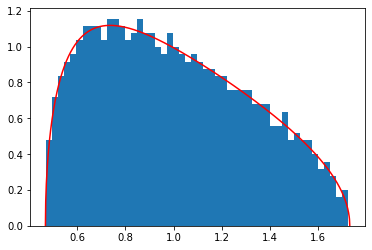

In [44]:
x = np.random.normal(0, 1, size = (T, N))
#x[:,0]=np.ones(T)
x[:,0]= np.sin([i for i in range(0,T)])
x[:,1]=np.ones(T)*3
#x[:,1]=np.ones(T)*3
cor = np.corrcoef(x, rowvar=0) 

eVal0 , eVec0 = getPCA( cor ) 
pdf0 = mpPDF(1., q=x.shape[0]/float(x.shape[1]), pts=N)
fig = plt.figure()
ax  = fig.add_subplot(111)
ax.hist(np.diag(eVal0), density = True,bins=50) # Histogram the eigenvalues
plt.plot(pdf0.keys(), pdf0, color='r', label="Marcenko-Pastur pdf")
plt.show()